<a href="https://colab.research.google.com/github/Cliff12001/IMSE-441/blob/main/IMSE_441_Midterm_2_(CR).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import ttest_1samp
from statsmodels.stats.power import TTestIndPower
from scipy.stats import ttest_rel
import pandas as pd
from sklearn.metrics import mean_squared_error
from sklearn.metrics import explained_variance_score
import sklearn.linear_model as lm

In [ ]:
%pip install pingouin
import pingouin as pg

**QUESTION** **1**

In [3]:
#H0= 4 grams, H1 /= 4
O2 = [5.0, 3.4, 3.9, 1.3, 0.2, 0.9, 2.7, 3.7, 3.8, 4.1, 1.0, 1.0, 0.8, 0.4, 3.8, 4.5, 5.3, 6.1, 6.9, 6.5]

a:)

In [4]:
ttest_1samp(a=O2, popmean= 4)

TtestResult(statistic=-1.5451353441390414, pvalue=0.13880710560932794, df=19)

In [5]:
t_stat, p_value= ttest_1samp(a=O2, popmean= 4)

In [6]:
if p_value < 0.05:
  print("We reject the null hypothesis")

else:
  print("We fail to rejet the null hypothesis")

We fail to rejet the null hypothesis


b:)

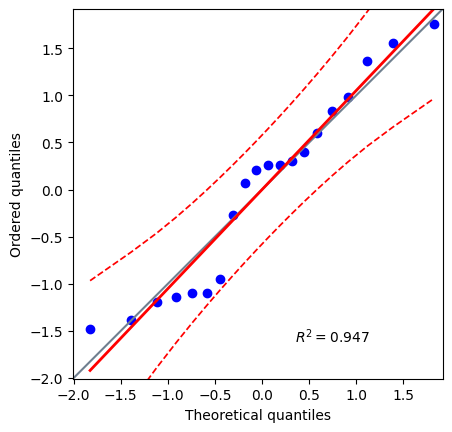

In [7]:
#normality check
pg.qqplot(O2)
plt.show()

c:)

In [8]:
power_analysis = TTestIndPower()
power = power_analysis.power(effect_size = 0, alpha = 0.01, nobs1= 20, alternative = 'smaller')#nobs1= sample size
# Print results
print('The power for the hypothesis testing is', round(power, 2))

The power for the hypothesis testing is 0.01


d:)

In [9]:
true_mean = np.mean(O2)
print("True Mean: ", true_mean)

True Mean:  3.2649999999999997


**QUESTION** **2**

In [33]:
F1 = [63, 57, 58, 62, 66, 58, 61, 60, 55, 62, 59, 60, 58]
F2 = [69, 65, 59, 62, 61, 57, 59, 60, 62, 61, 66, 68, 66]

a:)

There is evidence to support the claim that there is different water hardness at each facility. At Facility 1 the mean water hardness is 59.92, while at Facility 2 the water hardness is 62.7. This can support that Facility 1 and Facility 2 have different water hardnesses.

In [34]:
np.mean(F1)

59.92307692307692

In [35]:
np.mean(F2)

62.69230769230769

b:)

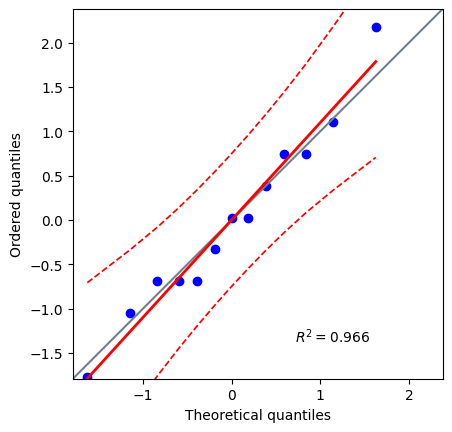

In [36]:
pg.qqplot(F1)
plt.show()

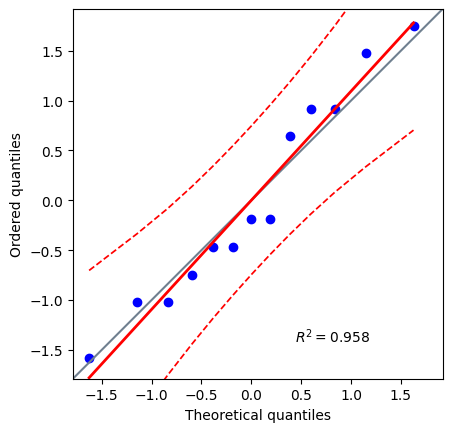

In [37]:
pg.qqplot(F2)
plt.show()

c:)

We can see that from the graphs above Facility 1 data is within the range and is much closer to the line. Also Facility 1 has a R^2 of 0.966. Facility 2 is also within the range, but it is not as tight to the line. Facility 2 has a R^2 of 0.946 which is 0.20 smaller than facility 1

d:)

In [38]:
ttest_rel(a=F1, b=F2 ).confidence_interval(confidence_level=.95)

ConfidenceInterval(low=-5.572896894983533, high=0.034435356521994365)

e:)

In [20]:
Before = [85.2, 79.6, 75.8, 76.2, 91, 89.8, 82, 81.7, 63.7, 68.4, 70, 74, 66.8, 60, 94, 88.2]
After = [83.5, 78.1, 73.2, 74, 90.2, 87, 79.9, 78.5, 64, 65.1, 67.8, 70, 64.6, 58.6, 92.9, 88]

In [21]:
ttest_rel(a=Before, b= After).confidence_interval(confidence_level=.99)

ConfidenceInterval(low=1.0937434415977196, high=2.7812565584022813)

**Question 3**

f:)

In [16]:
df= pd.read_csv('/content/drive/MyDrive/Q3 data.csv')
df.head()

,Month,Temp.,Usage/1000
0,Jan.,21,185.79
1,Feb.,24,214.47
2,Mar.,32,288.03
3,Apr.,47,424.84
4,May,50,454.58


In [21]:
x = df[['Temp.']]
y= df['Usage/1000']
x

,Temp.
0,21
1,24
2,32
3,47
4,50
5,59
6,68
7,74
8,62
9,50


In [24]:
model = lm.LinearRegression()
model.fit(x,y)

LinearRegression()

In [25]:
print('Coefficients: ', model.coef_)
print("y-intercept ", model.intercept_)

Coefficients:  [9.20836204]
y-intercept  -6.335501662133765


In [26]:
r_sq = model.score(x, y)
r_sq

0.9998654907970707

In [27]:
y_pred = model.predict(x)
y_pred

array([187.04010124, 214.66518737, 288.33208371, 426.45751435,
       454.08260048, 536.95785887, 619.83311726, 675.08328951,
       564.582945  , 454.08260048, 371.2073421 , 269.91535963])

In [28]:
import statsmodels.api as sm
x = sm.add_constant(x)
model1 = sm.OLS(y, x).fit()
print(model1.summary())

                            OLS Regression Results                            
Dep. Variable:             Usage/1000   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 7.433e+04
Date:                Sat, 29 Apr 2023   Prob (F-statistic):           1.08e-20
Time:                        22:39:29   Log-Likelihood:                -23.903
No. Observations:                  12   AIC:                             51.81
Df Residuals:                      10   BIC:                             52.78
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -6.3355      1.668     -3.799      0.0

/usr/local/lib/python3.9/dist-packages/scipy/stats/_stats_py.py:1736: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=12
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [29]:
print(model1.ssr)

37.74608893925655


In [30]:
residual = y - y_pred
residual

0    -1.250101
1    -0.195187
2    -0.302084
3    -1.617514
4     0.497400
5     2.072141
6     1.716883
7    -0.023290
8    -2.552945
9    -1.152600
10   -1.257342
11    4.064640
Name: Usage/1000, dtype: float64

In [31]:
sse = residual*residual
sse.sum()

37.74608893925666

***Bonus Question 5***

The term Regression was coined by Francis Galton.

**Bonus Question 6**

In [25]:
NC = [10.7, 10.7, 10.4, 10.9, 10.5, 10.3, 9.6, 11.1, 11.2, 10.4] 
C = [9.6, 10.4, 9.7, 10.3, 9.2, 9.3, 9.9, 9.5, 9.0, 10.9]

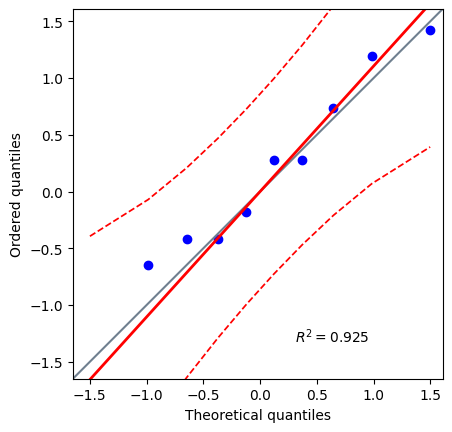

In [26]:
pg.qqplot(NC)
plt.show()

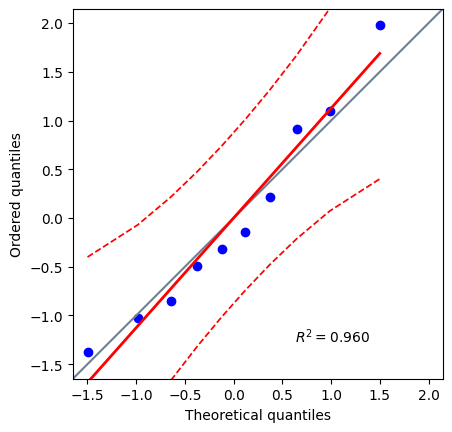

In [27]:
pg.qqplot(C)
plt.show()

In [28]:
ttest_rel(a=NC, b= C)

TtestResult(statistic=3.052931107888705, pvalue=0.013727661553065843, df=9)

In [29]:
ttest_rel(a=NC, b= C).confidence_interval(confidence_level=.95)

ConfidenceInterval(low=0.20721697731190103, high=1.3927830226880986)

Pvalues is 0.0137 which is less that 0.05, therefore we reject the null hypothesis.